In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("time_series_s.csv", index_col="timestamp", parse_dates=True)
df = df.iloc[::-1]
df

,open,high,low,close,volume
timestamp,,,,,
2020-10-27,89.480,90.345,89.1700,90.05,8027508
2020-10-28,88.650,88.950,86.6100,87.17,12738752
2020-10-29,87.170,89.110,86.6100,88.30,8440044
2020-10-30,87.750,88.390,85.6300,86.96,11402795
2020-11-02,87.540,87.765,85.4500,85.97,8904850
...,...,...,...,...,...
2021-03-16,110.568,112.340,109.8900,111.34,11376177
2021-03-17,111.310,111.460,108.9327,110.46,10128448
2021-03-18,109.280,110.270,107.5000,107.62,7813431


### SMA

In [3]:
def sma(data):
    n = int(input("SMA period: "))
    return data["close"].rolling(n).mean()

In [4]:
df["sma"] = sma(df)
df

SMA period: 5


,open,high,low,close,volume,sma
timestamp,,,,,,
2020-10-27,89.480,90.345,89.1700,90.05,8027508,NaN
2020-10-28,88.650,88.950,86.6100,87.17,12738752,NaN
2020-10-29,87.170,89.110,86.6100,88.30,8440044,NaN
2020-10-30,87.750,88.390,85.6300,86.96,11402795,NaN
2020-11-02,87.540,87.765,85.4500,85.97,8904850,87.690
...,...,...,...,...,...,...
2021-03-16,110.568,112.340,109.8900,111.34,11376177,108.630
2021-03-17,111.310,111.460,108.9327,110.46,10128448,109.166
2021-03-18,109.280,110.270,107.5000,107.62,7813431,109.226


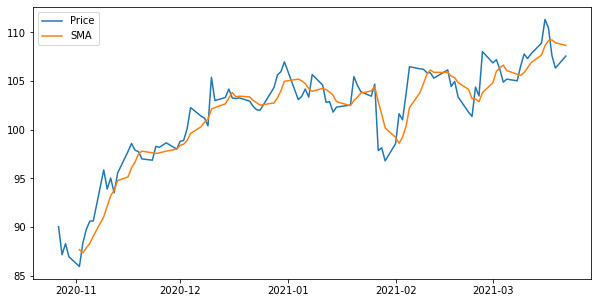

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df["close"], label="Price")
plt.plot(df["sma"], label="SMA")
plt.legend()
plt.show()

### ADR

In [6]:
from itertools import accumulate

In [7]:
def adr(data):
    money_flow_multiplier = ((data["close"]-data["low"])-(data["high"]-data["close"]))/(data["high"]-data["low"])
    money_flow_volume = money_flow_multiplier * data["volume"]
    adr = accumulate(money_flow_volume)
    return list(adr)

In [8]:
df["adr"] = adr(df)
df

,open,high,low,close,volume,sma,adr
timestamp,,,,,,,
2020-10-27,89.480,90.345,89.1700,90.05,8027508,NaN,3.996674e+06
2020-10-28,88.650,88.950,86.6100,87.17,12738752,NaN,-2.644897e+06
2020-10-29,87.170,89.110,86.6100,88.30,8440044,NaN,3.259981e+05
2020-10-30,87.750,88.390,85.6300,86.96,11402795,NaN,-8.714662e+04
2020-11-02,87.540,87.765,85.4500,85.97,8904850,87.690,-4.991546e+06
...,...,...,...,...,...,...,...
2021-03-16,110.568,112.340,109.8900,111.34,11376177,108.630,-4.552903e+06
2021-03-17,111.310,111.460,108.9327,110.46,10128448,109.166,-2.439687e+06
2021-03-18,109.280,110.270,107.5000,107.62,7813431,109.226,-9.576142e+06


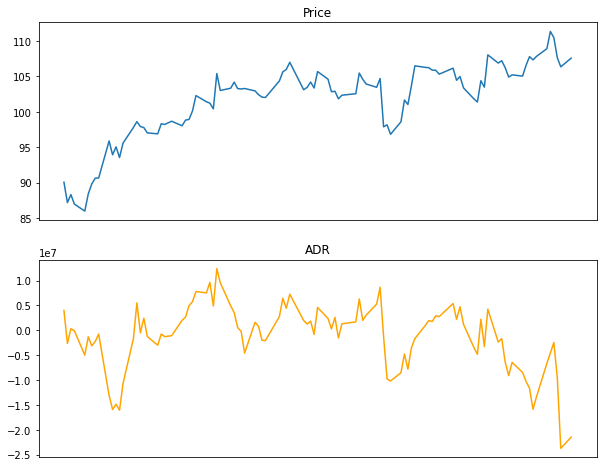

In [9]:
fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=1)
axes[0].set(title="Price", xticks=[])
axes[0].plot(df["close"])
axes[1].set(title="ADR", xticks=[])
axes[1].plot(df["adr"], color="orange")
plt.show()